<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Final Project 1 </font></h1>

---
# FINAL PROJECT 1
---

##  A. PROJECT OVERVIEW

Pada project ini akan dilakukan penerapan Linear Regression menggunakan dataset Uber & Lfyt yang dapat diakses di [sini](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma). Ini merupakan dataset yang baik jika ingin menggunakan Model Regresi Linier untuk melihat pola antara predektor yang berbeda seperti jam dan harga. Dataset Uber & Lfyt berisikan 693071 baris dengan 57 kolom yang 10 diantaranya paling relevan. Dataset ini mengenai biaya perjalanan menggunakan Uber & Lfyt yang dipengaruhi berdasarkan waktu, jarak, penggandaan harga. Yang menjadi variabel respon nya adalah harga/*price*. 

Atribut information :
- id
- timestamp
- hour
- day
- month
- datetime 
- timezone
- source : destinasi awal
- destination : destinasi akhir
- cab_type : tipe transportasi (uber/lfyt)
- dan lain-lain...

##### Objektif 
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

Dengan menggunakan konsep regression dengan Linear regression dapat mengetahui seberapa besar dampak waktu, jarak, penggandaan harga, dan kondisi cuaca yang ada terhadap harga/*price* saat menggunakan uber & lfyt. Selain itu akan dibuat model prediksi dari faktor-faktor yang mempengaruhi.

---

## B. IMPORT PUSTAKA YANG DIBUTUHKAN

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.metrics import accuracy_score
import pickle
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

---
## C. DATA LOADING

In [6]:
# membaca dataset
df_ride = pd.read_csv("rideshare_kaggle.csv")
pd.set_option("display.max_columns",57)

In [7]:
# menampilkan 5 data teratas
df_ride.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [8]:
# menampilkan 5 data terbawah
df_ride.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


Sekarang, akan melihat berapa banyak baris dan kolom didalam dataset/ dimensi dataset,

In [9]:
# menampilkan baris dan kolom di dataset
df_ride.shape

(693071, 57)

Diketahui bahwa didalam dataset, ada sebanyak 693071 baris dengan banyak 57 kolom.

Selanjutnya kita akan melihat informasi dasar tentang kerangka data.

In [10]:
# menampilkan informasi type data setiap variabel
df_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari informasi yang dapat diketahui, dapat dilihat ada 29 type data float, 17 type data integer, dan 11 type data object.

Menampilkan kolom-kolom yang ada di dataset.

In [11]:
df_ride.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

Selanjutnya, memeriksa central tendency dari data numerik pada dataset.

In [12]:
df_ride.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

---
## D. DATA CLEANING

Selanjutnya kita akan menghapus kolom-kolom yang tidak digunakan.

In [13]:
kol = (['id', 'apparentTemperature', 'short_summary', 'long_summary', 
       'precipIntensity', 'humidity', 'windSpeed','windGust', 
       'windGustTime', 'visibility', 'temperatureHigh','temperatureHighTime', 
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 
       'apparentTemperatureHighTime','apparentTemperatureLow', 'icon', 
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 
       'ozone', 'sunriseTime', 'moonPhase', 'precipIntensityMax',
       'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'precipProbability',
       'apparentTemperatureLowTime', 'sunsetTime', 'day', 'timestamp', 'temperature' ])
df_ride.drop(kol, axis=1, inplace=True)

In [14]:
# memanggil 5 data teratas
df_ride.head()

,hour,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude
0,9,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


Kita akan mengubah nama-nama kolom yang diperlukan.

In [15]:
df_ride.rename(columns={'datetime':'Keterangan_Waktu','month':'Bulan', 'hour' : 'Jam',
                       'timezone': 'Zona_Waktu','source' : 'Destinasi_Awal',
                       'destination':'Destinasi_Akhir','cab_type':'Tipe_Transportasi',
                       'product_id': 'Id_Produk','name': 'Nama', 
                       'price': 'Harga', 'distance': 'Jarak', 
                       'surge_multiplier': 'Penggandaan_Harga'}, inplace=True)

In [16]:
df_ride.head(5)

,Jam,Bulan,Keterangan_Waktu,Zona_Waktu,Destinasi_Awal,Destinasi_Akhir,Tipe_Transportasi,Id_Produk,Nama,Harga,Jarak,Penggandaan_Harga,latitude,longitude
0,9,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033
1,2,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033
2,1,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033
3,4,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033
4,3,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033


Disini kita akan mengganti tipe dan menambahkan kolom yang dibutuhkan.

In [17]:
# Mengubah type data kolom Keterangan_Waktu menjadi type datetime
df_ride['Keterangan_Waktu'] = pd.to_datetime(df_ride['Keterangan_Waktu'], errors='coerce')

In [18]:
# Menambahkan kolom tanggal
df_ride["Tanggal"] = pd.to_datetime(df_ride["Keterangan_Waktu"]).dt.date

# Menambahkan kolom waktu
df_ride["Waktu"] = pd.to_datetime(df_ride["Keterangan_Waktu"]).dt.time

# Menambahkan kolom hari
df_ride["Hari"] = df_ride["Tanggal"].apply(lambda x: x.weekday())
df_ride["Hari"] = df_ride["Hari"].map({0: 'Senin', 
                                       1: 'Selasa', 
                                       2: 'Rabu', 
                                       3: 'Kamis', 
                                       4: 'Jumat',
                                       5: 'Sabtu',
                                       6: 'Minggu'})


# Menambahkan kolom keterangan waktu pada saat itu sesuai dengan jamnya
df_ride.loc[(df_ride.Jam >= 6) & (df_ride.Jam < 12), 'Waktu_dalam_sehari'] = 'Pagi'
df_ride.loc[(df_ride.Jam >= 12) & (df_ride.Jam < 15), 'Waktu_dalam_sehari'] = 'Siang'
df_ride.loc[(df_ride.Jam >= 15) & (df_ride.Jam < 18), 'Waktu_dalam_sehari'] = 'Sore'
df_ride.loc[(df_ride.Jam >= 18) | (df_ride.Jam < 6), 'Waktu_dalam_sehari'] = 'Malam'


In [19]:
df_ride = df_ride[['Tipe_Transportasi', 'Nama', 'Destinasi_Awal', 
                   'Destinasi_Akhir', 'Jarak', 'Harga', 'Penggandaan_Harga', 
                   'Keterangan_Waktu', 'Waktu','Jam','Tanggal', 'Hari', 'Bulan', 
                   'Zona_Waktu','Id_Produk', 'latitude', 'longitude']]

df_ride.head(3)

,Tipe_Transportasi,Nama,Destinasi_Awal,Destinasi_Akhir,Jarak,Harga,Penggandaan_Harga,Keterangan_Waktu,Waktu,Jam,Tanggal,Hari,Bulan,Zona_Waktu,Id_Produk,latitude,longitude
0,Lyft,Shared,Haymarket Square,North Station,0.44,5.0,1.0,2018-12-16 09:30:07,09:30:07,9,2018-12-16,Minggu,12,America/New_York,lyft_line,42.2148,-71.033
1,Lyft,Lux,Haymarket Square,North Station,0.44,11.0,1.0,2018-11-27 02:00:23,02:00:23,2,2018-11-27,Selasa,11,America/New_York,lyft_premier,42.2148,-71.033
2,Lyft,Lyft,Haymarket Square,North Station,0.44,7.0,1.0,2018-11-28 01:00:22,01:00:22,1,2018-11-28,Rabu,11,America/New_York,lyft,42.2148,-71.033


Selanjutnya akan menampilkan hasil dari dimensi data setelah dilakukannya data cleaning.

In [20]:
df_ride.shape

(693071, 17)

Setelah dilakukan nya data cleaning, diketahui bahwa didalam dataset ada sebanyak 693071 baris dengan banyak kolom 17.

---
## E. EDA (EXPLORATORY DATA ANALYSIS)

##### Disini akan dilihat perbandingan banyaknya jumlah transportasi uber dan lyft

In [21]:
df_ride['Tipe_Transportasi'].value_counts()

Uber    385663
Lyft    307408
Name: Tipe_Transportasi, dtype: int64

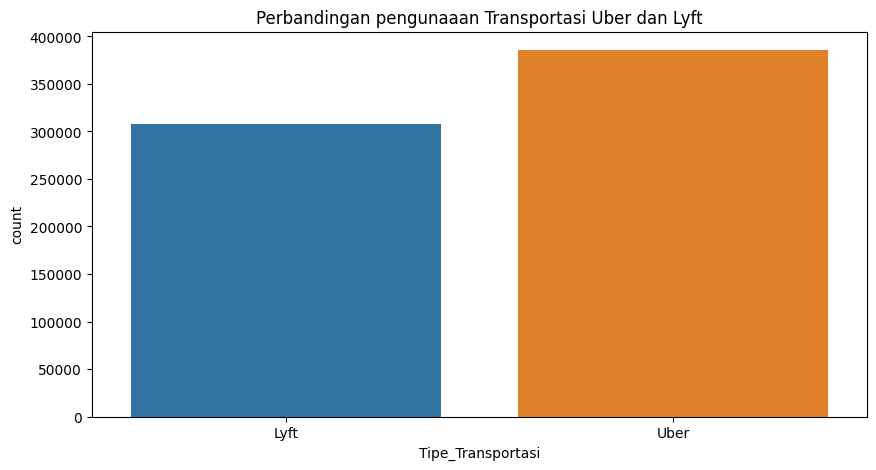

In [22]:
# Membuat visualisasi data
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(x='Tipe_Transportasi', data=df_ride)
plt.title('Perbandingan pengunaaan Transportasi Uber dan Lyft')
plt.show()

Berdasarkan visualisasi diatas dapat kita ketahui, transportasi Uber mempunyai data sebanyak 385663 dan transportasi Lyft mempunyai data sebanyak 307408.

---
#### Selanjutnya kita akan melihat rata-rata harga dari tipe transportasi uber & lyft

In [23]:
df_tipetrans= df_ride[['Tipe_Transportasi','Harga']]
# set index
df_tipetrans_mean = df_tipetrans.reset_index()[["Tipe_Transportasi", 
                                          "Harga"]].groupby(["Tipe_Transportasi"]).mean().sort_values(by="Harga",
                                           ascending=True)
# menampilkan data 
df_tipetrans_mean

,Harga
Tipe_Transportasi,
Uber,15.795343
Lyft,17.351396


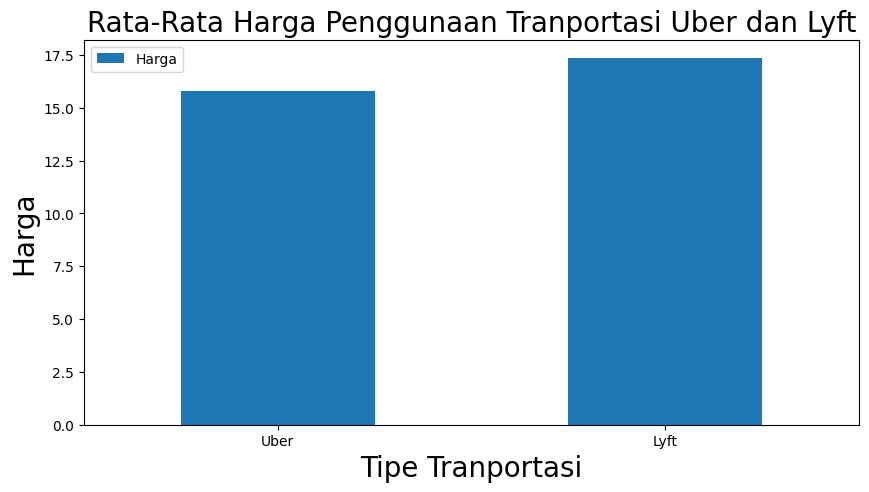

In [56]:
# inisiasi bar chart
df_tipetrans_mean.plot(kind = 'bar', 
                    figsize=(10,5), 
                    legend = True)

# membuat nama judul bar chart
plt.title("Rata-Rata Harga Penggunaan Tranportasi Uber dan Lyft", fontsize = 20)
# membuat nama xlabel
plt.xlabel("Tipe Tranportasi", fontsize = 20)
# membuat nama ylabel
plt.ylabel("Harga", fontsize = 20)

plt.xticks(rotation = 360)
# menampilkan bar chart
plt.show()

Berdasarkan hasil diatas dapat diketahui bahwa harga rata-rata uber dan lyft berbeda. Bisa dilihat dari, harga rata-rata pemakaian tipe tranportasi Lyft lebih tinggi (17.351396) dari pada tipe tranportasi Uber (15.795343).

---
#### Selanjutnya akan membuat korelasi tipe transportasi Uber & Lfyt terhadap jarak, harga, dan penggandaan harga. Sebelum itu, kita akan memisahkan data transportasi uber dan lfyt.

In [25]:
df_trans = df_ride.copy()
df_trans = df_trans[['Tipe_Transportasi','Jarak','Harga','Penggandaan_Harga']]
df_uber = df_trans[df_trans['Tipe_Transportasi'] == 'Uber']
df_lyft = df_trans[df_trans['Tipe_Transportasi'] == 'Lyft']

                      Jarak     Harga  Penggandaan_Harga
Jarak              1.000000  0.336204                NaN
Harga              0.336204  1.000000                NaN
Penggandaan_Harga       NaN       NaN                NaN


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Jarak'),
  Text(0, 1.5, 'Harga'),
  Text(0, 2.5, 'Penggandaan_Harga')])

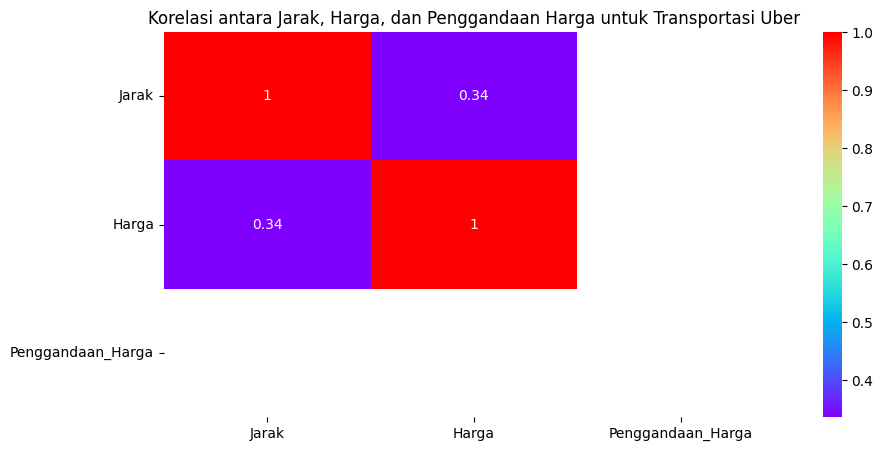

In [26]:
# Menghitung koefisien korelasi pada dataframe Uber
from logging.handlers import RotatingFileHandler
print(df_uber.corr())

# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(10, 5))
ax = sns.heatmap(df_uber.corr(), annot=True, cmap='rainbow')

plt.title("Korelasi antara Jarak, Harga, dan Penggandaan Harga untuk Transportasi Uber")
plt.yticks(rotation = 360)

Dari visualisasi diatas kita dapat mengetahui untuk pengaruh penggunaan transportasi Uber berdasarkan jarak,harga, dan penggandaan harga. Korelasi  antara jarak dan harga sebesar 0.34 yang artinya jarak dan harga saling berpengaruh. Dengan kata lain, semakin jauh jarak yang ditempuh menggunakan transportasi uber, maka harga semakin bertambah. Untuk faktor penggandaan harga dalam transportasi uber tidak membuat penggandaan harga.

                      Jarak     Harga  Penggandaan_Harga
Jarak              1.000000  0.361567           0.040076
Harga              0.361567  1.000000           0.308237
Penggandaan_Harga  0.040076  0.308237           1.000000


(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Jarak'),
  Text(0, 1.5, 'Harga'),
  Text(0, 2.5, 'Penggandaan_Harga')])

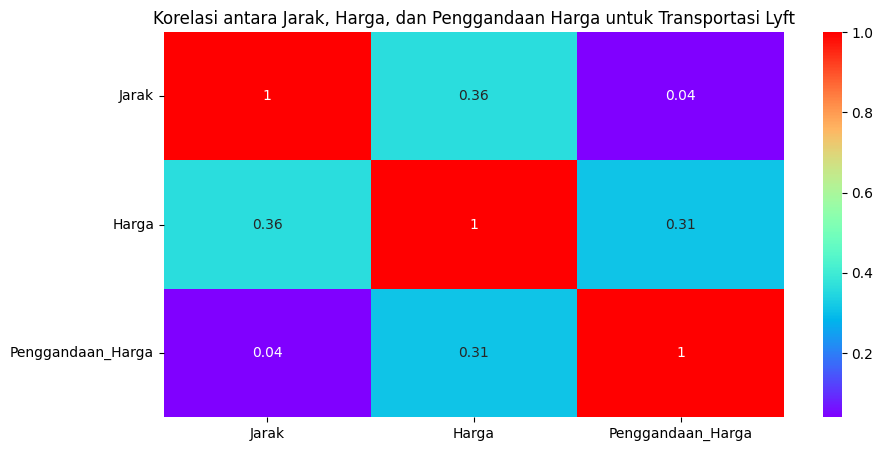

In [27]:
# Menghitung koefisien korelasi pada dataframe Lyft
print(df_lyft.corr())

# Visualisasi korelasi menggunakan heatmap plot
plt.figure(figsize=(10, 5))
ax = sns.heatmap(df_lyft.corr(), annot=True, cmap='rainbow')

plt.title("Korelasi antara Jarak, Harga, dan Penggandaan Harga untuk Transportasi Lyft")
plt.yticks(rotation = 360)

Dari visualisasi diatas kita dapat mengetahui untuk pengaruh penggunaan transportasi Lyft berdasarkan harga, jarak, dan penggandaan harga. Korelasi  antara jarak dan harga sebesar 0.36 yang artinya jarak dan harga saling berpengaruh. Dengan kata lain, semakin jauh jarak yang ditempuh menggunakan transportasi Lyft, maka harga semakin bertambah. Sementara untuk korelasi antara harga dan penggandaan harga juga memiliki korelasi sebesar 0.31 yang berarti juga berpengaruh adanya pertambahan harga.

Dengan demikian, hubungan antara jarak, harga, dan penggandaan harga dengan memakai transportasi Lyft mempunyai pengaruh. Semakin jauh jarak yang tempuh semakin bertambah harga ataupun dapat mengalami kenaikan harga. Dengan koefisien relasi sebesar 0.3.

---
#### Disini kita akan membuat perbandingan Harga dan Jarak antara Transportasi Uber dan Lyft

Text(0, 0.5, 'Harga')

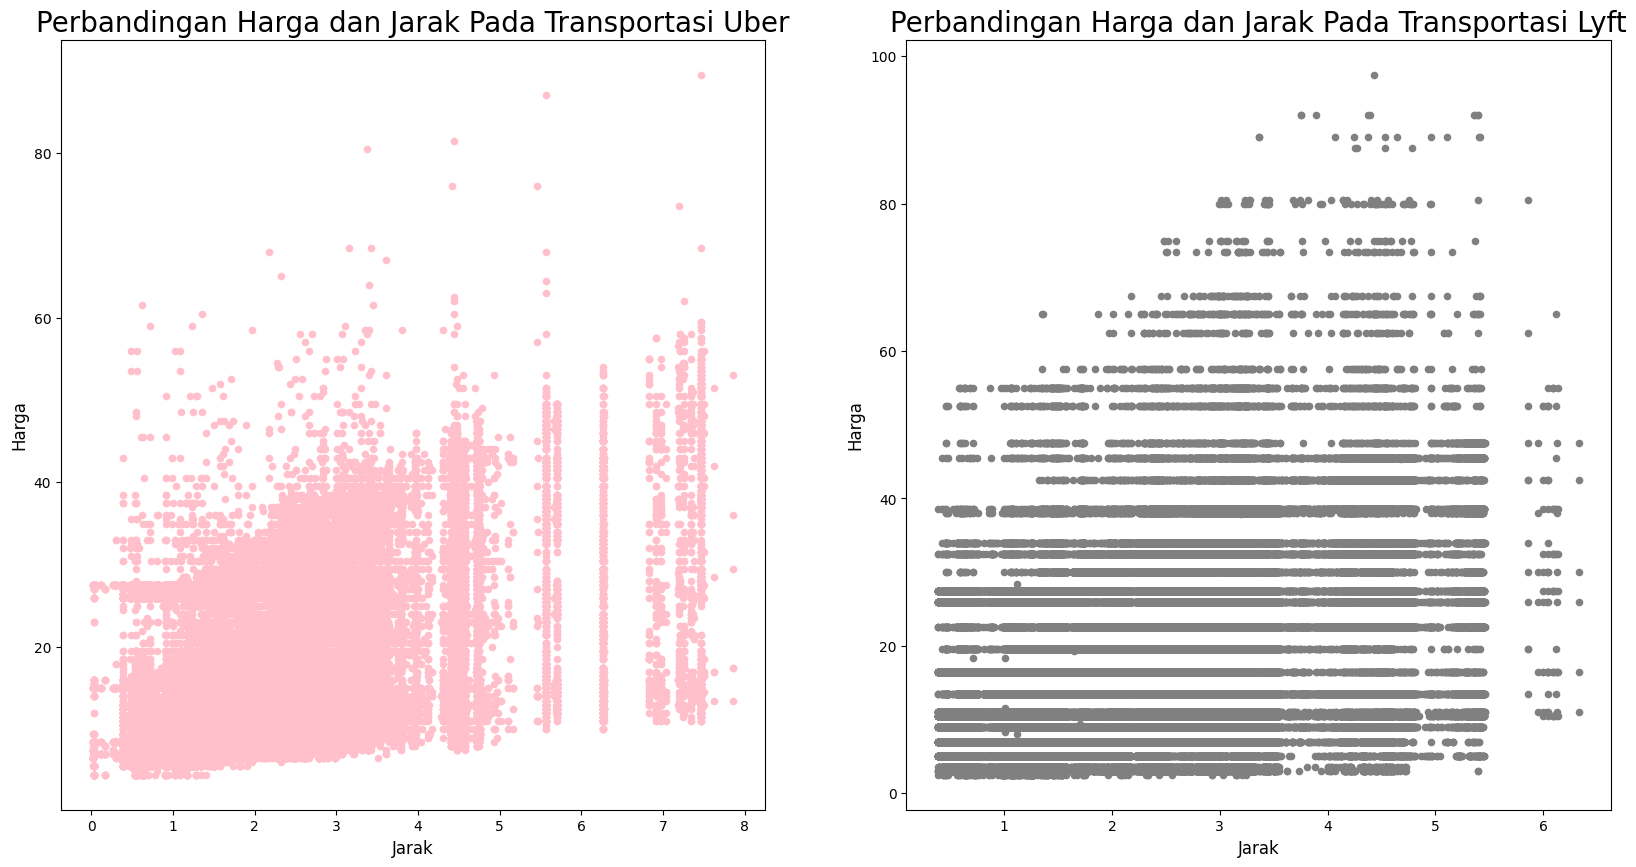

In [28]:
# Membuat subplot untuk scatterplot pada dataframe Uber & Lyft
fig = plt.figure(figsize=(20,10))

ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Scatterplot untuk dataframe Uber
df_uber.plot(kind='scatter', x="Jarak", y="Harga", ax=ax0, color="pink")
ax0.set_title("Perbandingan Harga dan Jarak Pada Transportasi Uber", fontsize=20)
ax0.set_xlabel("Jarak", fontsize=12)
ax0.set_ylabel("Harga", fontsize=12)

# Scatterplot untuk dataframe Lyft
df_lyft.plot(kind="scatter", x="Jarak", y="Harga", ax=ax1, color="grey")
ax1.set_title("Perbandingan Harga dan Jarak Pada Transportasi Lyft", fontsize=20)
ax1.set_xlabel("Jarak", fontsize=12)
ax1.set_ylabel("Harga", fontsize=12)


Berdasarkan visualisasi diatas, dapat kita ketahui perbandingan antara Jarak dan Harga di transportasi Uber dan Lyft. 
Dimana pada plot tersebut terlihat bahwa Harga hanya ada pertambahan sedikit saat Jarak bertambah, hal ini juga ditunjukkan oleh koefisien korelasi yang tidak terlalu besar sehingga hubungan linearnya tidak terlalu kuat. Pola yang dibentuk oleh Uber dan Lyft juga menunjukkan perbedaan. Titik persebaran pada transportasi taksi Lyft lebih konstan dibanding dengan Uber, hal ini dikarenakan terdapat penggandaan harga yang diberlakukan oleh transportasi Lyft.

---
#### Selanjutnya kita akan melihat perbandingan antara tipe transporatsi Uber dan Lyft terhadap jarak yang ditempuh.

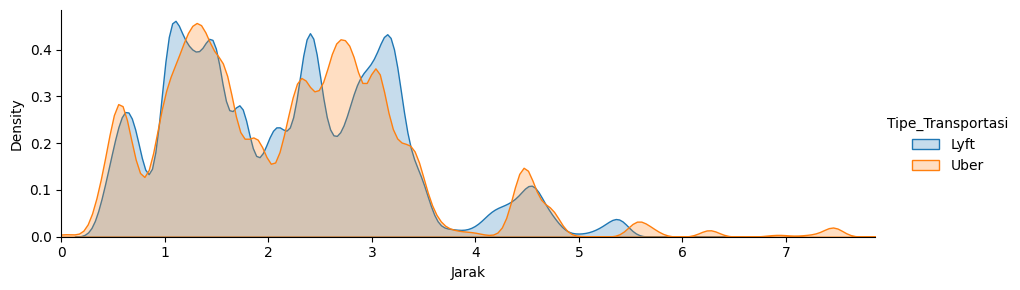

In [29]:
df_uber = sns.FacetGrid(df_ride, hue="Tipe_Transportasi", aspect = 3)
df_uber.map(sns.kdeplot, 'Jarak', shade=True)
df_uber.set(xlim=(0,df_ride['Jarak'].max()))
df_uber.add_legend()

plt.show()

Berdasarkan visualisasi diatas dapat dilihat menurut jarak yang ditempuh dari kedua tipe tranportasi tersebut, jarak yang ditempuh hanya berbeda tipis.

---
#### Selanjutnya kita akan membuat perbandingan harga rata-rata menurut jarak yang ditempuh Transportasi Uber dan Lyft

In [30]:
# Dataframe Uber & Lyft dengan jarak dan waktunya
df_trans = df_ride[['Tipe_Transportasi','Jarak','Harga']]
df_trans.dropna(axis=0, inplace=True)
df_trans.head()

,Tipe_Transportasi,Jarak,Harga
0,Lyft,0.44,5.0
1,Lyft,0.44,11.0
2,Lyft,0.44,7.0
3,Lyft,0.44,26.0
4,Lyft,0.44,9.0


In [31]:
# Pivot table distance & price berdasarkan tipe taksi (missing values diabaikan)
df_price = pd.pivot_table(df_trans, columns="Tipe_Transportasi", index="Jarak", values="Harga", aggfunc=np.mean)
df_price.head()

Tipe_Transportasi,Lyft,Uber
Jarak,,
0.02,NaN,11.850000
0.03,NaN,11.666667
0.04,NaN,12.000000
0.12,NaN,12.000000
0.17,NaN,11.583333


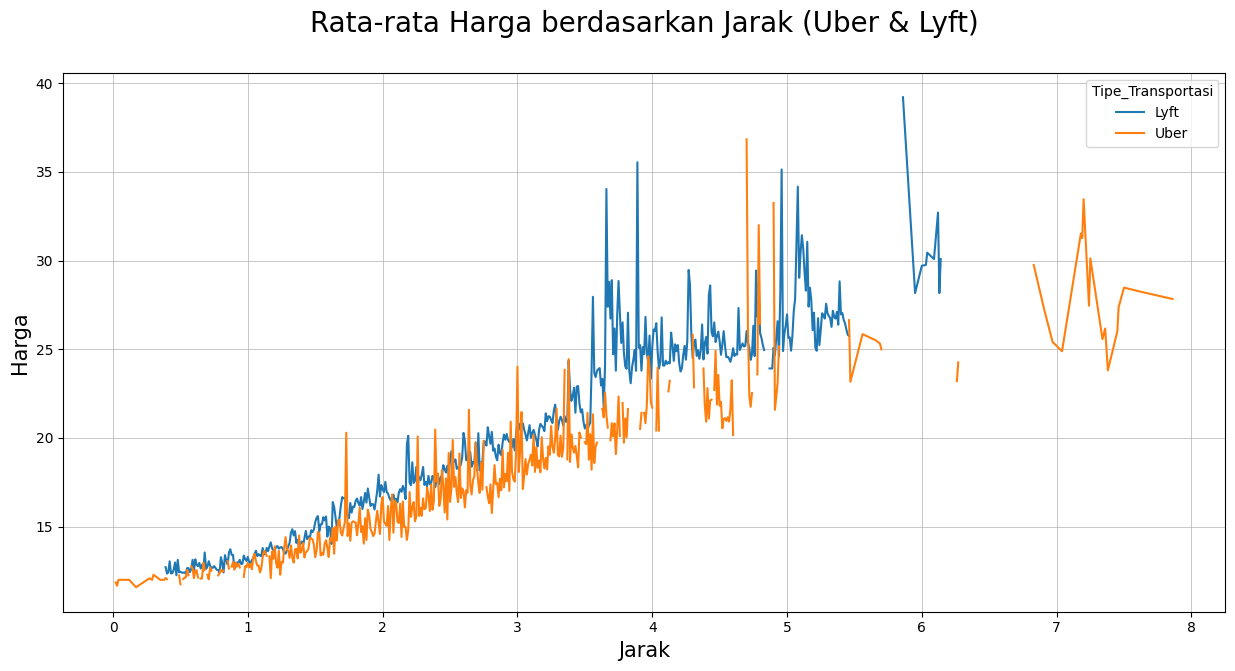

In [32]:
#Plotting rata-rata harga berdasarkan jarak masing-masing taksi
df_price.plot(kind="line", figsize=(15,7))
plt.title("Rata-rata Harga berdasarkan Jarak (Uber & Lyft)\n", fontsize=20)
plt.xlabel("Jarak", fontsize=15)
plt.ylabel("Harga", fontsize=15)
plt.grid(linewidth=0.5)
plt.show()

Berdasarkan visualisasi diatas, diketahui bahwa Uber cenderung menawarkan harga yang lebih rendah dibanding Lyft, sehingga Uber lebih ekonomis dibandingkan Lyft, tetapi Lyft juga menawarkan harga yang kompetitif.

---
#### Disini kita akan melihat total harga dari setiap kali pemakaian transportasi Uber dan Lyft

In [33]:
print(df_ride.groupby(['Tipe_Transportasi','Harga']).size())

Tipe_Transportasi  Harga
Lyft               2.5        211
                   3.0       5543
                   3.5       5063
                   5.0      14014
                   7.0      35853
                            ...  
Uber               76.0         2
                   80.5         1
                   81.5         1
                   87.0         1
                   89.5         1
Length: 173, dtype: int64


Berdasarkan hasil diatas, informasi yang dapat kita ketahui:
- Untuk transportasi Lyft dengan harga tertinggi 7.0 sebanyak 35853 kali digunakan
- Untuk transportasi Uber dengan harga tertinggi 89.5 sebanyak 1 kali digunakan

---
#### Sekarang, kita akan menentukan jumlah perjalanan Uber dan Lyft berdasarkan Hari.

In [36]:
df_hari = (df_ride.groupby(['Tipe_Transportasi','Hari']).size())
df_hari

Tipe_Transportasi  Hari  
Lyft               Jumat     40064
                   Kamis     43471
                   Minggu    40552
                   Rabu      32791
                   Sabtu     40195
                   Selasa    55417
                   Senin     54918
Uber               Jumat     49948
                   Kamis     55034
                   Minggu    50978
                   Rabu      40900
                   Sabtu     49973
                   Selasa    69532
                   Senin     69298
dtype: int64

Berdasarkan hasil diatas, informasi yang dapat kita ketahui :
- Untuk Lyft 
  - Penggunaan Lyft terbanyak ada di hari Selasa dengan jumlah 55417 dan yang terendah pada hari Rabu dengan jumlah 32791.
- Untuk Uber
  - Penggunaan Uber terbanyak ada di hari Selasa dengan jumlah 69532 dan yang terendah pada hari Rabu dengan jumlah 40900.

---
## F. DATA PREPROCESSING

#### Kita akan mengambil kolom-kolom yang dibutuhkan

In [37]:
# Mengambil kolom-kolom yang dibutuhkan
df_col = ['Tipe_Transportasi','Nama','Jarak','Jam','Harga', 'Penggandaan_Harga']
df1 = df_ride[df_col]

In [38]:
df1

,Tipe_Transportasi,Nama,Jarak,Jam,Harga,Penggandaan_Harga
0,Lyft,Shared,0.44,9,5.0,1.0
1,Lyft,Lux,0.44,2,11.0,1.0
2,Lyft,Lyft,0.44,1,7.0,1.0
3,Lyft,Lux Black XL,0.44,4,26.0,1.0
4,Lyft,Lyft XL,0.44,3,9.0,1.0
...,...,...,...,...,...,...
693066,Uber,UberXL,1.00,23,13.0,1.0
693067,Uber,UberX,1.00,23,9.5,1.0
693068,Uber,Taxi,1.00,23,NaN,1.0
693069,Uber,Black SUV,1.00,23,27.0,1.0


In [39]:
data = df1.copy()

#### Melihat ringkasan nilai statistik untuk kolom yang sekarang

In [40]:
data.describe()

,Jarak,Jam,Harga,Penggandaan_Harga
count,693071.000000,693071.000000,637976.000000,693071.000000
mean,2.189430,11.619137,16.545125,1.013870
std,1.138937,6.948114,9.324359,0.091641
min,0.020000,0.000000,2.500000,1.000000
25%,1.280000,6.000000,9.000000,1.000000
50%,2.160000,12.000000,13.500000,1.000000
75%,2.920000,18.000000,22.500000,1.000000
max,7.860000,23.000000,97.500000,3.000000


In [41]:
# Memisahkan/memecah data
jarak = data["Jarak"]
penggandaan_harga = data["Penggandaan_Harga"]
harga = data["Harga"]

<AxesSubplot: >

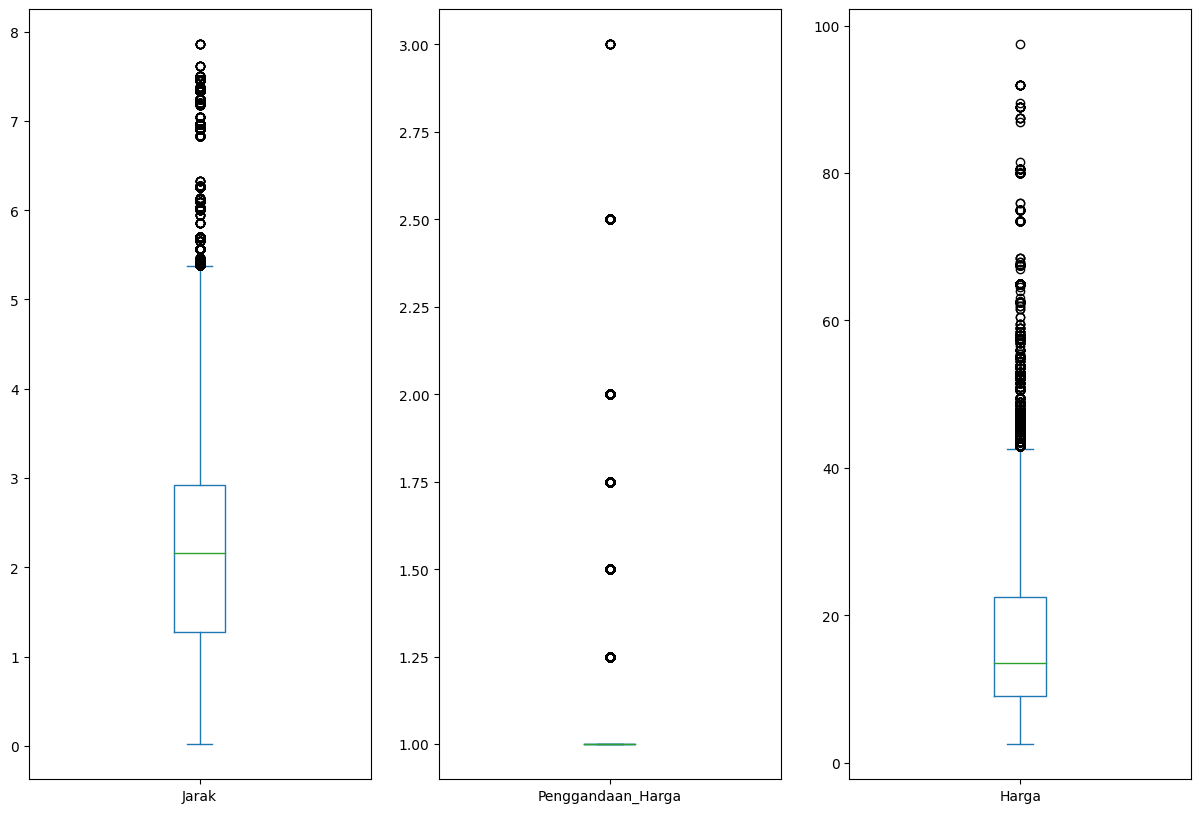

In [42]:
# Visualisasi dengan boxplot
# Membuat subplot
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(1,3,1)
ax1 = fig.add_subplot(1,3,2)
ax2 = fig.add_subplot(1,3,3)

jarak.plot(kind="box", ax=ax0)
penggandaan_harga.plot(kind="box", ax=ax1)
harga.plot(kind="box", ax=ax2)

In [43]:
# Encoding semua kolom kategori menggunakan OneHotEncoder
col_category = data.select_dtypes(include=['object','category']).columns.tolist()

# Menginisiasi OneHotEncoder dan concatinating original data with encoded column data's
for col in col_category:
    encoder = OneHotEncoder(handle_unknown = 'ignore')
    enc_data = pd.DataFrame(encoder.fit_transform(data[[col]]).toarray())
    enc_data.columns = encoder.get_feature_names([col])
    data = data.drop(col, axis=1)
    data = pd.concat([data, enc_data],axis=1)

In [44]:
data

,Jarak,Jam,Harga,Penggandaan_Harga,Tipe_Transportasi_Lyft,Tipe_Transportasi_Uber,Nama_Black,Nama_Black SUV,Nama_Lux,Nama_Lux Black,Nama_Lux Black XL,Nama_Lyft,Nama_Lyft XL,Nama_Shared,Nama_Taxi,Nama_UberPool,Nama_UberX,Nama_UberXL,Nama_WAV
0,0.44,9,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.44,2,11.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.44,1,7.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.44,4,26.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.44,3,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,1.00,23,13.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
693067,1.00,23,9.5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
693068,1.00,23,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
693069,1.00,23,27.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Mengurutkan kolom data
cols = ["Jam",
        "Jarak",
        "Penggandaan_Harga",
        "Tipe_Transportasi_Uber",
        "Tipe_Transportasi_Lyft",
        "Nama_UberX",
        "Nama_UberXL",
        "Nama_Black",
        "Nama_Black SUV",
        "Nama_WAV",
        "Nama_UberPool",
        "Nama_Taxi",
        "Nama_Shared",
        "Nama_Lyft",
        "Nama_Lyft XL",
        "Nama_Lux",
        "Nama_Lux Black",
        "Nama_Lux Black XL",
        "Harga"]
data = data[cols]

In [46]:
data

,Jam,Jarak,Penggandaan_Harga,Tipe_Transportasi_Uber,Tipe_Transportasi_Lyft,Nama_UberX,Nama_UberXL,Nama_Black,Nama_Black SUV,Nama_WAV,Nama_UberPool,Nama_Taxi,Nama_Shared,Nama_Lyft,Nama_Lyft XL,Nama_Lux,Nama_Lux Black,Nama_Lux Black XL,Harga
0,9,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
2,1,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
4,3,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,23,1.00,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
693067,23,1.00,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.5
693068,23,1.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
693069,23,1.00,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


#### Menghilangkan missing value

In [47]:
# mengecek missing value
data.isnull().sum()

Jam                           0
Jarak                         0
Penggandaan_Harga             0
Tipe_Transportasi_Uber        0
Tipe_Transportasi_Lyft        0
Nama_UberX                    0
Nama_UberXL                   0
Nama_Black                    0
Nama_Black SUV                0
Nama_WAV                      0
Nama_UberPool                 0
Nama_Taxi                     0
Nama_Shared                   0
Nama_Lyft                     0
Nama_Lyft XL                  0
Nama_Lux                      0
Nama_Lux Black                0
Nama_Lux Black XL             0
Harga                     55095
dtype: int64

Diketahui pada kolom harga terdapat 55095 missing value, untuk itu kita kan menghapus missing valuenya.

In [48]:
# menghapus missing value
data.dropna(inplace=True)

In [49]:
# mengecek kembali missing value pada data
data.isnull().sum()

Jam                       0
Jarak                     0
Penggandaan_Harga         0
Tipe_Transportasi_Uber    0
Tipe_Transportasi_Lyft    0
Nama_UberX                0
Nama_UberXL               0
Nama_Black                0
Nama_Black SUV            0
Nama_WAV                  0
Nama_UberPool             0
Nama_Taxi                 0
Nama_Shared               0
Nama_Lyft                 0
Nama_Lyft XL              0
Nama_Lux                  0
Nama_Lux Black            0
Nama_Lux Black XL         0
Harga                     0
dtype: int64

In [50]:
data.head()

,Jam,Jarak,Penggandaan_Harga,Tipe_Transportasi_Uber,Tipe_Transportasi_Lyft,Nama_UberX,Nama_UberXL,Nama_Black,Nama_Black SUV,Nama_WAV,Nama_UberPool,Nama_Taxi,Nama_Shared,Nama_Lyft,Nama_Lyft XL,Nama_Lux,Nama_Lux Black,Nama_Lux Black XL,Harga
0,9,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0
2,1,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,26.0
4,3,0.44,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.0


In [51]:
X = data.drop('Harga', axis=1)
y = data['Harga']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [53]:
model =  LinearRegression()

In [54]:
model.fit(X_train,y_train)

LinearRegression()

In [57]:
y_pred = model.predict(X_test)